In [1]:
import os
import pandas as pd
import numpy as np
import random
from pandas import DataFrame
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
import matplotlib
from matplotlib import pyplot as plt
from sklearn.metrics import r2_score

# input file path
workdir = "D://DrugResponsivenessGuideline_log//Github//200914_reupload//Dataset//Scenario8_individual_model_approach"

In [2]:
drug_list = ["AEW541","Nilotinib","17-AAG","PHA-665752","Lapatinib","Nutlin-3"
            ,"AZD0530","PF2341066","L-685458","ZD-6474","Panobinostat","Sorafenib"
            ,"Irinotecan","Topotecan","LBW242","PD-0325901","PD-0332991","Paclitaxel"
            ,"PLX4720","RAF265","TAE684","TKI258","Erlotinib","AZD6244"]

AEW541_//n
train_X shape: (303, 21213)
303 train samples
75 test samples
StartTime : 2020-09-18 16:22:12.350737
EndTime : 2020-09-18 16:22:12.946515
AEW541’s final rmse value is = 1.115801
AEW541 R-squared value is = -0.161044
Nilotinib_//n
train_X shape: (248, 21213)
248 train samples
61 test samples
StartTime : 2020-09-18 16:22:13.103096
EndTime : 2020-09-18 16:22:13.623703
Nilotinib’s final rmse value is = 1.145832
Nilotinib R-squared value is = -3.619563
17-AAG_//n
train_X shape: (302, 21213)
302 train samples
75 test samples
StartTime : 2020-09-18 16:22:13.827160
EndTime : 2020-09-18 16:22:15.926335
17-AAG’s final rmse value is = 1.515798
17-AAG R-squared value is = -0.314831
PHA-665752_//n
train_X shape: (302, 21213)
302 train samples
75 test samples
StartTime : 2020-09-18 16:22:16.093888
EndTime : 2020-09-18 16:22:16.253474
PHA-665752’s final rmse value is = 0.738585
PHA-665752 R-squared value is = -0.032848
Lapatinib_//n
train_X shape: (303, 21213)
303 train samples
75 test sam

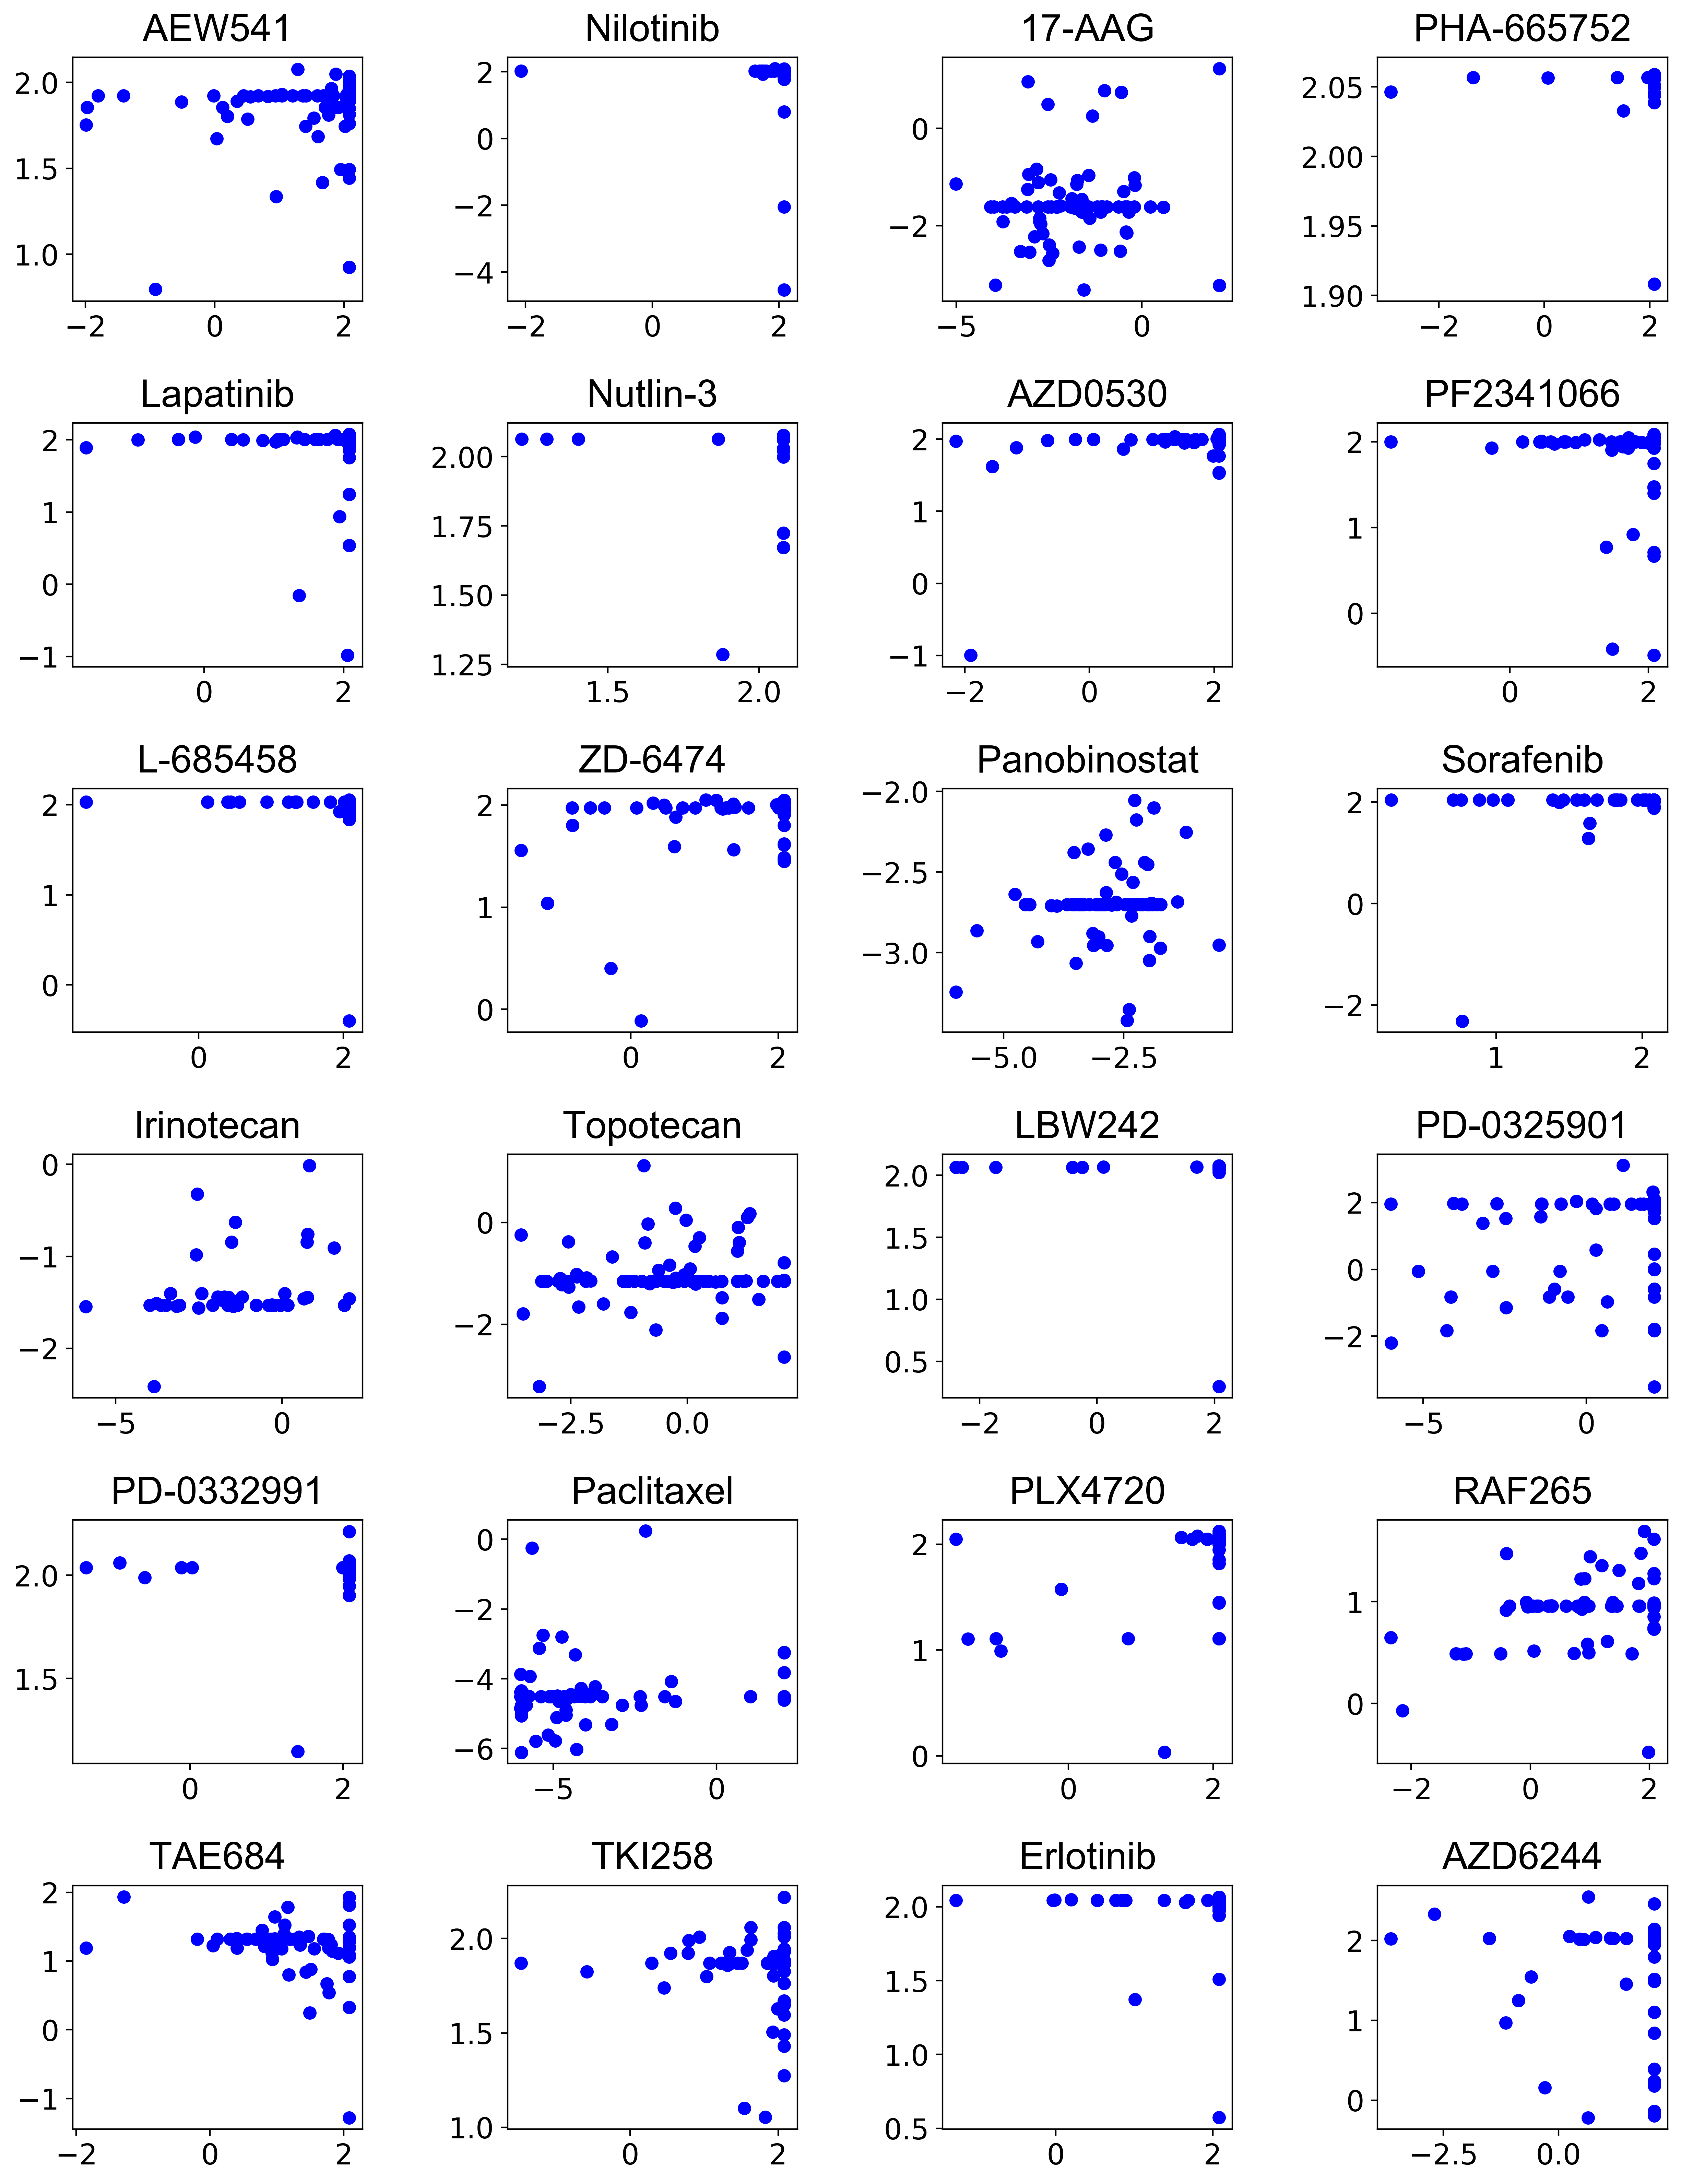

In [3]:
rmselist = []
r2list = []

# drug_list = ["Topotecan"]
fig = plt.figure(figsize=(15,20),dpi=400)
fig.subplots_adjust(hspace=0.5, wspace=0.5)
num = 1
for dname in drug_list:
    
    print('%s_//n' % dname)
    # read input file and index file for training and test set
    dataset = np.load(workdir + "//200914_MC9K_%s.npz" % dname)
    ss0 = np.load(workdir + '//200914_MC9K_%s_0_8_2.npz' % dname)

    # input and index file assign
    x = dataset['x']
    y = dataset['y']
    # y_linear = dataset['y_lnIC50']
    ss0_train = ss0['train']
    ss0_test = ss0['test']
    
    # training and test dataset assign
    train_X, train_y = x[ss0_train], y[ss0_train]
    test_X, test_y = x[ss0_test], y[ss0_test]

    # data typing and the number of dataset
    train_X = train_X.astype('float32')
    test_X = test_X.astype('float32')
    # train_X /= 255
    # test_X /= 255
    print('train_X shape:', train_X.shape)
    print(train_X.shape[0], 'train samples')
    print(test_X.shape[0], 'test samples')
    
    # model fitting
    StartTime8 = datetime.now()
    print("StartTime :", StartTime8)

    lasso_regressor = Lasso(alpha=0.001)
    lasso_regressor.fit(train_X,train_y)

    EndTime8 = datetime.now()
    print("EndTime :", EndTime8)
    
    predicted_classes = lasso_regressor.predict(test_X)
    predicted_value = predicted_classes

    
    # saving predicted ln(IC50)s and ln(IC50)s in the test set
    a = pd.DataFrame(predicted_value)
    b = pd.DataFrame(test_y)
    c = pd.concat([a,b], axis=1)
    c.columns=["Predicted","Test"]
    workdir = "D://DrugResponsivenessGuideline_log//Github//200914_reupload//Result//scenario8_individual_approach//Table//Lasso"
    c.to_csv(workdir + '//200915_scenario8_Lasso_%s_pred_and_val_result.csv' % dname, index=False)

    # RMSE
    rse = ((b[0]-a[0])**2).sum()
    mse = rse / len(b)
    rmse = np.sqrt(mse)
    print("%s’s final rmse value is = %f" % (dname,rmse))
    
    # R-squared value
    r2_value = r2_score(b,a)
    print("%s R-squared value is = %f" % (dname,r2_value))
    rmselist.append(rmse)
    r2list.append(r2_value)
          
    plt.subplot(6,4,num)
    plt.scatter(test_y,predicted_value,c='blue')
    plt.title(dname,fontdict ={'fontsize' : 20},fontname="Arial",y = 1.02)
    plt.tick_params(labelsize=15)
    
    num += 1
#     plt.scatter(test_y,predicted_value,c='red')
#     plt.xlabel('test_IC50_value')
#     plt.ylabel('predicted_IC50_value')
#     plt.savefig(workdir + '//%s_test_scatterplot.png' % dname)
    
    workdir = "D://DrugResponsivenessGuideline_log//Github//200914_reupload//Dataset//scenario8_individual_model_approach"
workdir = "D://DrugResponsivenessGuideline_log//Github//200914_reupload//Result//scenario8_individual_approach//Figure"    

plt.savefig(workdir +'//200915_scenario8_Lasso_plot.png', dpi=400)

In [4]:
num

25

In [5]:
print("This is lasso regression with expression dataset for each drugs")
a = pd.DataFrame(drug_list)
b = pd.DataFrame(rmselist)
c =pd.DataFrame(r2list)
result = pd.concat([a,b,c],axis=1)
result.columns = ['Drug','RMSE','R2value']

This is lasso regression with expression dataset for each drugs


In [6]:
result

,Drug,RMSE,R2value
0,AEW541,1.115801,-0.161044
1,Nilotinib,1.145832,-3.619563
2,17-AAG,1.515798,-0.314831
3,PHA-665752,0.738585,-0.032848
4,Lapatinib,0.897219,-0.518868
5,Nutlin-3,0.180994,-0.364818
6,AZD0530,0.909041,0.115194
7,PF2341066,0.870215,-0.641411
8,L-685458,0.675115,-0.318298
9,ZD-6474,0.932321,-0.014494


In [7]:
workdir = "D://DrugResponsivenessGuideline_log//Github//200914_reupload//Result//Scenario8_individual_approach" 
result.to_csv(workdir +'//200915_scenario8_Lasso_24drugs_metrics.csv', index=False)